### Data Science Project: Predicting Bengaluru House Price
#### By Run Ariyasriwatana

#### About this project
This project aims to predict the real estate price and find the most influential factor on house price in Bengaluru, India. By doing feature engineering which is clean, complete and explore the dataset, we got useful insight and behavior of the real estate price in Bengaluru. Feature selection was put in to build the machine learning model that can predict the house price. I applied three algorithms, tuned hyperparameter to improve the model performance and selected the best one.

#### Workflow Stages
1. Understand the problem statement
2. Acquire the datasets
3. Feature engineering
    - Define feature category
    - Drop unnessary features
    - Handle the missing values
    - Exploratory data analysis (EDA)
    - Dimensionally reduction
    - Outlier removal
4. Feature selection
5. Model building
    - Linear regression
    - Lasso regression
    - Decision tree
6. Hyperparameter tuning
7. Model deployment
8. Solution of the problem statement
9. How to improve the project

#### 1. Understand the problem statement

The problem statement is to predict the real estate sale price in Bengaluru and try to identify main factors that influences the house price.

#### 2. Acquire the dataset

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#### 3. Feature Engineering

##### 3.1 Define feature category

In [5]:
# get column names
col =  list(df.columns)
col, len(col)

(['area_type',
  'availability',
  'location',
  'size',
  'society',
  'total_sqft',
  'bath',
  'balcony',
  'price'],
 9)

In [6]:
# Let's examine area type feature
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Meaning of each area type
- Carpet area: net usable area or can be covered by carpet
- Plot area: The complete area that is under your ownership or between the fencing 
- Built-up area: Carpet area + Area of walls
- Super built-up area: saleable area or Built-up area + common areas

In [7]:
# Let's examine availability feature
df['availability'].value_counts()

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [8]:
# Let's examine availability feature
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

Define feature category
- Sample Information: location
- Datetime: availability
- Numerical feature (Discrete): bath, balcony, size
- Numerical feature (Continuous): total_sqft, price
- Categorical feature: area_type, society
- Ordinal categorical feature: -

##### 3.2 Drop unnessary features

can drop features that are not required to build the model such as availability and society
- Almost 80 % of the availability column is ready to move
- Numbers of society is too much for model training

In [9]:
# see proportion as a percentage
df['availability'].value_counts(normalize=True) * 100

Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
15-Aug            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: availability, Length: 81, dtype: float64

In [10]:
# Let's see how many society in this dataset
len(df['society'].value_counts())

2688

In [11]:
# drop availability and society columns
df2 = df.drop(['availability', 'society'], axis=1)

will use these feature to analyze later.

##### 3.3 Handle the missing values

In [12]:
# check how many null values in each column
df2.isnull().sum()

area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

can drop missing values in location and size feature because it is not significant

In [13]:
df3 = df2.dropna(subset=['location', 'size'])

House size column which is refer to the number of bedroom is unformatted.

Create new feature for number of bedrooms

In [14]:
df3['size'].value_counts()

2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

In [15]:
# create new feature for the number of bedroom
df3['bedroom'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/var/folders/g1/g_9zbkxs5l93w9hhc55wfsx80000gn/T/ipykernel_13365/2569661311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bedroom'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [16]:
df3.head()

,area_type,location,size,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [17]:
df3.isnull().sum()

area_type       0
location        0
size            0
total_sqft      0
bath           57
balcony       593
price           0
bedroom         0
dtype: int64

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13303 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13303 non-null  object 
 1   location    13303 non-null  object 
 2   size        13303 non-null  object 
 3   total_sqft  13303 non-null  object 
 4   bath        13246 non-null  float64
 5   balcony     12710 non-null  float64
 6   price       13303 non-null  float64
 7   bedroom     13303 non-null  int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 935.4+ KB


some value must not be a number

In [20]:
# create function that can check whether data change datatype to float
def try_convert_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [21]:
# try the function
try_convert_float('3')

True

In [22]:
# filter samples that can't convert to float
df3[~df3['total_sqft'].apply(try_convert_float)].head(20)

,area_type,location,size,total_sqft,bath,balcony,price,bedroom
30,Super built-up Area,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Built-up Area,Devanahalli,4 Bedroom,3010 - 3410,NaN,NaN,192.000,4
81,Built-up Area,Hennur Road,4 Bedroom,2957 - 3450,NaN,NaN,224.500,4
122,Super built-up Area,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Super built-up Area,Devanahalli,3 BHK,1520 - 1740,NaN,NaN,74.820,3
410,Super built-up Area,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


we see total_sqft as a range and as a sq.meter unit

convert range data to numeric data by calculating their mean

In [23]:
# find mean of the range
def convert_range_to_num(x):
    split_range = x.split(' - ')
    if len(split_range) == 2:
        return (np.mean([float(split_range[0]), float(split_range[1])]))
    try:
        return float(x)
    except:
        return x

In [24]:
# drop size column
df4 = df3.drop('size', axis=1)

In [25]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_range_to_num)

In [26]:
# only sample with strange unit should have left 
df4[~df4['total_sqft'].apply(try_convert_float)].head(15)

,area_type,location,total_sqft,bath,balcony,price,bedroom
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.5,1
648,Built-up Area,Arekere,4125Perch,9.0,NaN,265.0,9
775,Built-up Area,Basavanagara,1000Sq. Meter,2.0,1.0,93.0,1
872,Super built-up Area,Singapura Village,1100Sq. Yards,2.0,NaN,45.0,2
1019,Plot Area,Marathi Layout,5.31Acres,1.0,0.0,110.0,1
1086,Plot Area,Narasapura,30Acres,2.0,2.0,29.5,2
1400,Super built-up Area,Chamrajpet,716Sq. Meter,9.0,1.0,296.0,9
1712,Plot Area,Singena Agrahara,1500Sq. Meter,3.0,1.0,95.0,3
1743,Super built-up Area,Hosa Road,142.61Sq. Meter,3.0,1.0,115.0,3
1821,Plot Area,Sarjapur,1574Sq. Yards,3.0,1.0,76.0,3


In [27]:
# check how many samples are in the wrong unit
len(df4[~df4['total_sqft'].apply(try_convert_float)])

46

can ignore samples with wrong unit

In [28]:
# drop samples with wrong unit
df5 = df4[df4['total_sqft'].apply(try_convert_float)]

In [29]:
df5['total_sqft'] = df5['total_sqft'].astype(float)

/var/folders/g1/g_9zbkxs5l93w9hhc55wfsx80000gn/T/ipykernel_13365/3542105270.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['total_sqft'] = df5['total_sqft'].astype(float)


In [30]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13257 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13257 non-null  object 
 1   location    13257 non-null  object 
 2   total_sqft  13257 non-null  float64
 3   bath        13200 non-null  float64
 4   balcony     12668 non-null  float64
 5   price       13257 non-null  float64
 6   bedroom     13257 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 828.6+ KB


In [31]:
df5.isnull().sum()

area_type       0
location        0
total_sqft      0
bath           57
balcony       589
price           0
bedroom         0
dtype: int64

try to complete bath column  by finding the relationship with the number of bedroom

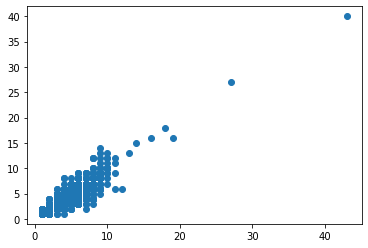

In [32]:
# plot scatter to check relationship between number of bathroom and the number of bedroom
plt.scatter( df5[~df5['bath'].isnull()]['bedroom'], df5[~df5['bath'].isnull()]['bath'] )
plt.show()

can use regression model to guess number of missing bathroom data

In [33]:
# prepare data to train model
havebath = df5[~df5['bath'].isnull()]
bath_tocom = df5[df5['bath'].isnull()]
havebathx = havebath[['bedroom']]
havebathy = havebath[['bath']]
bath_tocomx = bath_tocom[['bedroom']]

In [34]:
# import neccessary machine learning libraries
from sklearn.linear_model import LinearRegression

In [35]:
# train the model
guessbath = LinearRegression()
guessbath.fit(havebathx, havebathy)

LinearRegression()

In [36]:
# guess the number of bathrooms
bath_tocomy = guessbath.predict(bath_tocomx)
bath_tocomy

array([[3.80630179],
       [3.80630179],
       [2.87635147],
       [1.01645083],
       [4.73625211],
       [4.73625211],
       [3.80630179],
       [3.80630179],
       [2.87635147],
       [2.87635147],
       [1.01645083],
       [1.01645083],
       [3.80630179],
       [3.80630179],
       [3.80630179],
       [3.80630179],
       [2.87635147],
       [2.87635147],
       [2.87635147],
       [2.87635147],
       [3.80630179],
       [3.80630179],
       [2.87635147],
       [2.87635147],
       [3.80630179],
       [2.87635147],
       [2.87635147],
       [2.87635147],
       [3.80630179],
       [1.01645083],
       [3.80630179],
       [3.80630179],
       [2.87635147],
       [2.87635147],
       [3.80630179],
       [2.87635147],
       [2.87635147],
       [2.87635147],
       [2.87635147],
       [2.87635147],
       [3.80630179],
       [2.87635147],
       [1.01645083],
       [1.94640115],
       [3.80630179],
       [2.87635147],
       [2.87635147],
       [3.806

In [37]:
bath_tocomy.shape

(57, 1)

In [38]:
bath_tocom.head(15)

,area_type,location,total_sqft,bath,balcony,price,bedroom
56,Built-up Area,Devanahalli,3210.0,NaN,NaN,192.000,4
81,Built-up Area,Hennur Road,3203.5,NaN,NaN,224.500,4
224,Super built-up Area,Devanahalli,1630.0,NaN,NaN,74.820,3
344,Super built-up Area,Kanakpura Road,525.0,NaN,NaN,21.530,1
669,Super built-up Area,JP Nagar,5520.0,NaN,NaN,375.000,5
702,Super built-up Area,JP Nagar,5600.0,NaN,NaN,548.500,5
801,Super built-up Area,JP Nagar,4624.5,NaN,NaN,453.000,4
941,Super built-up Area,Whitefield,4348.5,NaN,NaN,304.000,4
1264,Built-up Area,Hennur,2264.0,NaN,NaN,155.000,3
1267,Super built-up Area,Yelahanka,1662.0,NaN,NaN,67.980,3


In [39]:
# add results in bath column
bath_tocom['bath'] = bath_tocomy
bath_tocom.head()

/var/folders/g1/g_9zbkxs5l93w9hhc55wfsx80000gn/T/ipykernel_13365/3867606110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath_tocom['bath'] = bath_tocomy


,area_type,location,total_sqft,bath,balcony,price,bedroom
56,Built-up Area,Devanahalli,3210.0,3.806302,NaN,192.00,4
81,Built-up Area,Hennur Road,3203.5,3.806302,NaN,224.50,4
224,Super built-up Area,Devanahalli,1630.0,2.876351,NaN,74.82,3
344,Super built-up Area,Kanakpura Road,525.0,1.016451,NaN,21.53,1
669,Super built-up Area,JP Nagar,5520.0,4.736252,NaN,375.00,5


In [40]:
# should round the number of bathroom
bath_tocom['bath'] = bath_tocom['bath'].round()
bath_tocom.head()

/var/folders/g1/g_9zbkxs5l93w9hhc55wfsx80000gn/T/ipykernel_13365/2093585899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath_tocom['bath'] = bath_tocom['bath'].round()


,area_type,location,total_sqft,bath,balcony,price,bedroom
56,Built-up Area,Devanahalli,3210.0,4.0,NaN,192.00,4
81,Built-up Area,Hennur Road,3203.5,4.0,NaN,224.50,4
224,Super built-up Area,Devanahalli,1630.0,3.0,NaN,74.82,3
344,Super built-up Area,Kanakpura Road,525.0,1.0,NaN,21.53,1
669,Super built-up Area,JP Nagar,5520.0,5.0,NaN,375.00,5


In [41]:
# combine with the rest of datasets
df6 = pd.concat([havebath, bath_tocom], axis = 0)

In [42]:
df6.head()

,area_type,location,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [43]:
df6.isnull().sum()

area_type       0
location        0
total_sqft      0
bath            0
balcony       589
price           0
bedroom         0
dtype: int64

try to complete balcony column by finding relationship with bedroom

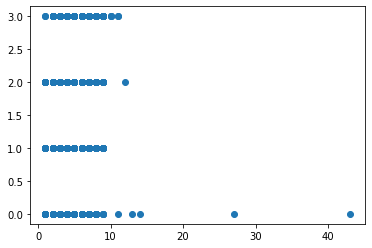

In [44]:
# plot scatter to check relationship between number of balcony and the number of bedroom
plt.scatter( df6[~df6['balcony'].isnull()]['bedroom'], df6[~df6['balcony'].isnull()]['balcony'] )
plt.show()

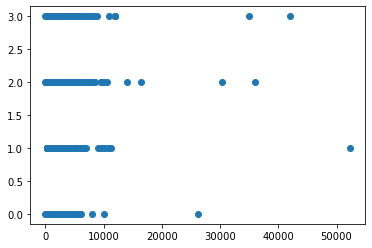

In [45]:
# plot scatter to check relationship between total sqft and the number of balcony
plt.scatter( df6[~df6['balcony'].isnull()]['total_sqft'], df6[~df6['balcony'].isnull()]['balcony'] )
plt.show()

(array([1019.,    0.,    0., 4880.,    0.,    0., 5100.,    0.,    0.,
        1669.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

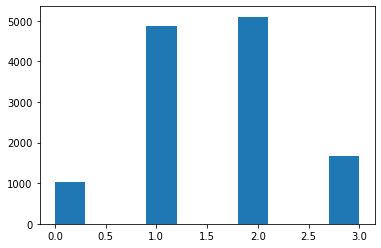

In [46]:
# plot histogram of balcony
plt.hist(df6[~df6['balcony'].isnull()]['balcony'])

In [47]:
# see the basic statistics of balcony column
df6['balcony'].describe()

count    12668.000000
mean         1.585649
std          0.816758
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: balcony, dtype: float64

After some speculation
- not a linear relationship with the number of bedroom and total_sqft so we can't use linear regression to guess the number of balcony
- but it's normal distribution so we can fill the missing values by random normally distributed number with balcony mean and standard deviation

In [48]:
# prepare the data
havebal = df6[~df6['balcony'].isnull()]
missbal = df6[df6['balcony'].isnull()]

In [49]:
# compute mean and standard deviation of balcony
bal_mean = havebal['balcony'].mean()
bal_std = havebal['balcony'].std()
bal_mean, bal_std

(1.5856488790653616, 0.8167578041663395)

In [50]:
# random normally distributed number with balcony mean and standard deviation
ran_bal = np.random.normal(bal_mean, bal_std, size = missbal.shape[0])

(array([  4.,  20.,  31.,  73., 109., 141., 110.,  63.,  29.,   9.]),
 array([-0.86809659, -0.40835167,  0.05139326,  0.51113818,  0.9708831 ,
         1.43062803,  1.89037295,  2.35011787,  2.8098628 ,  3.26960772,
         3.72935264]),
 <BarContainer object of 10 artists>)

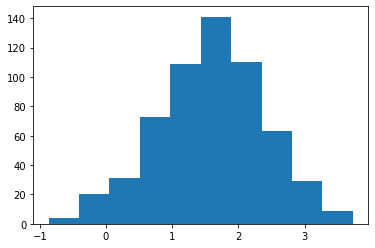

In [51]:
# check the distribution by plot the histogram
plt.hist(ran_bal)

have to round and clear the negative one

In [52]:
# round the positive number that not exceed max value
ran_bal_list = []
for i in ran_bal:
    if havebal['balcony'].max() >= i >= 0:
        ran_bal_list.append(round(i))
    elif i < 0:
        ran_bal_list.append(round(i * -1))
    else:
        ran_bal_list.append(havebal['balcony'].max())

(array([ 49.,   0.,   0., 209.,   0.,   0., 249.,   0.,   0.,  82.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

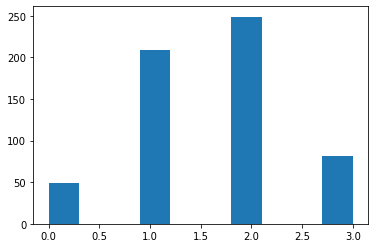

In [53]:
# check the distribution again
plt.hist(ran_bal_list)

In [54]:
# insert it into dataframe
missbal['balcony'] = ran_bal_list

/var/folders/g1/g_9zbkxs5l93w9hhc55wfsx80000gn/T/ipykernel_13365/4102208185.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missbal['balcony'] = ran_bal_list


In [55]:
missbal.head()

,area_type,location,total_sqft,bath,balcony,price,bedroom
6,Super built-up Area,Old Airport Road,2732.0,4.0,3.0,204.0,4
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,2.0,600.0,4
9,Plot Area,Gandhi Bazar,1020.0,6.0,2.0,370.0,6
34,Built-up Area,Kasturi Nagar,1925.0,3.0,3.0,125.0,3
40,Built-up Area,Murugeshpalya,1296.0,2.0,0.0,81.0,2


In [56]:
# combine with others
df7 = pd.concat([havebal, missbal], axis=0)

In [57]:
df7.head()

,area_type,location,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [58]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13257 entries, 0 to 13240
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   13257 non-null  object 
 1   location    13257 non-null  object 
 2   total_sqft  13257 non-null  float64
 3   bath        13257 non-null  float64
 4   balcony     13257 non-null  float64
 5   price       13257 non-null  float64
 6   bedroom     13257 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 828.6+ KB


##### 3.4 Exploratory Data Analysis (EDA)

3.4.1 univariate analysis

In [59]:
# check all features that need to be analyzed
df7.columns

Index(['area_type', 'location', 'total_sqft', 'bath', 'balcony', 'price',
       'bedroom'],
      dtype='object')

Let's start with availiblity and society because we've already dropped both of them

In [60]:
# start with availability of the property
avai = df['availability'].value_counts()
avai

Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [61]:
# get month out of date and month format
def get_month(x):
    if len(x.split('-')) == 2:
        return x.split('-')[1]
    else:
        return 'cannot split'

In [62]:
# test function
get_month('14-Jul'), get_month('hello')

('Jul', 'cannot split')

In [63]:
# create new column to extract the availability month
df['availability_month'] = df['availability'].apply(get_month)
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_month
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Dec
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,cannot split
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,cannot split
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,cannot split
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,cannot split


can see some can't split values

In [64]:
# check why it can't extract the month
df[df['availability_month'] == 'cannot split']['availability'].value_counts()

Ready To Move           10581
Immediate Possession       16
Name: availability, dtype: int64

In [65]:
# filter these words out
dt = df[df['availability'] != 'Ready To Move']
dt_time =  dt[dt['availability'] != 'Immediate Possession']

In [66]:
dt_time.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,availability_month
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,Dec
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00,May
10,Super built-up Area,18-Feb,Whitefield,3 BHK,NaN,1800,2.0,2.0,70.00,Feb
21,Super built-up Area,19-Dec,Binny Pete,3 BHK,She 2rk,1755,3.0,1.0,122.00,Dec
24,Super built-up Area,18-Nov,Thanisandra,1 RK,Bhe 2ko,510,1.0,0.0,25.25,Nov


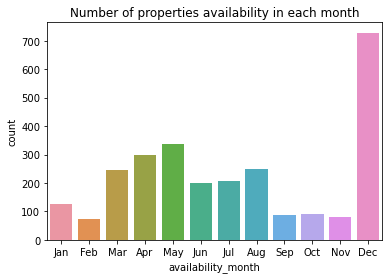

In [67]:
# plot countplot to see frequency of availability in each month
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.countplot(x='availability_month', data=dt_time, order=months)
plt.title('Number of properties availability in each month')
plt.show()

Availibity begin to rise around march and drop in september. Peak month is in december where around 700 properties will be available.

In [68]:
df['society'].unique().shape

(2689,)

Have a lot of society in this datasets

In [69]:
df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Amionce     1
JaghtDe     1
Jauraht     1
Brity U     1
RSntsAp     1
Name: society, Length: 2688, dtype: int64

In [70]:
# compute some statistic value
df['society'].value_counts().describe()

count    2688.000000
mean        2.908482
std         5.338120
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        80.000000
Name: society, dtype: float64

This dataset contains almost 2700 society which is very diverse. The maximum one is GrrvaGr at 80 properties. While the number of society average almost 3 houses. 

In [71]:
# set seaborn color pallete
sns.set_palette('rocket')

In [72]:
# Let's checking area type
df7['area_type'].value_counts(normalize=True) * 100

Super built-up  Area    66.214076
Built-up  Area          18.118730
Plot  Area              15.018481
Carpet  Area             0.648714
Name: area_type, dtype: float64

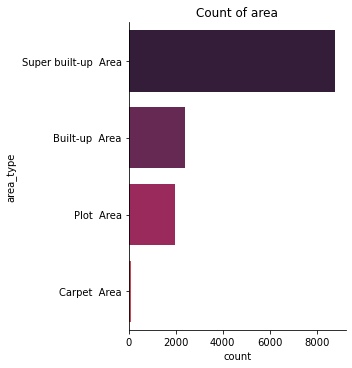

In [73]:
# plot countplot of area_type
sns.catplot(y='area_type', data=df7, kind='count', order = df7['area_type'].value_counts().index)
plt.title('Count of area')
plt.show()

66% of properties area listed in these dataset are super built-up area. While 15% and 12% are built-up and plot area respectively.

In [74]:
# location 
df7['location'].value_counts()

Whitefield                537
Sarjapur  Road            397
Electronic City           302
Kanakpura Road            271
Thanisandra               233
                         ... 
1Channasandra               1
Vijayabank bank layout      1
Saptagiri Layout            1
Near ullas theater          1
Sindhi Colony               1
Name: location, Length: 1298, dtype: int64

In [75]:
df7['location'].value_counts().describe()

count    1298.000000
mean       10.213405
std        29.592372
min         1.000000
25%         1.000000
50%         2.500000
75%         7.000000
max       537.000000
Name: location, dtype: float64

Almost 1300 location can be found listed in this dataset.

In [76]:
# compute first, third quartile and median of total area in sqft
df7['total_sqft'].quantile([0.25, 0.5, 0.75])

0.25    1100.0
0.50    1275.0
0.75    1680.0
Name: total_sqft, dtype: float64

In [77]:
# compute mean and standard deviation of total area
df7['total_sqft'].mean(), df7['total_sqft'].std()

(1558.8091751527495, 1238.4789353029262)

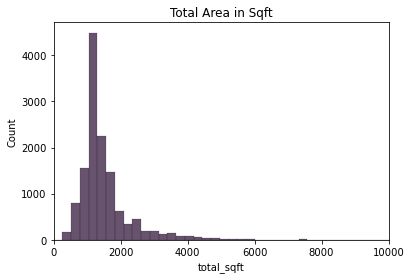

In [78]:
# plot histogram of total area in sqft
g = sns.histplot(df7['total_sqft'], bins=200)
g.set(xlim=(0, 10000))
plt.title('Total Area in Sqft')
plt.show()

The distribution of total area in sqft is positively skewed.

[(0.0, 10.0)]

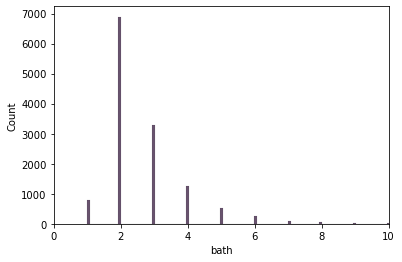

In [79]:
# let's see the bathroom distribution
g2 = sns.histplot(df7['bath'])
g2.set(xlim=(0, 10))

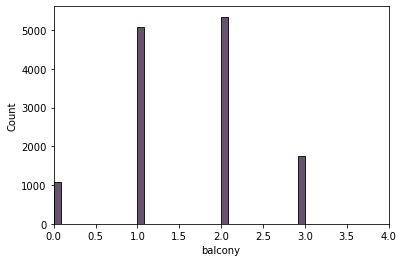

In [80]:
# let's see the balcony distribution
g2 = sns.histplot(df7['balcony'])
g2.set(xlim=(0, 4))
plt.show()

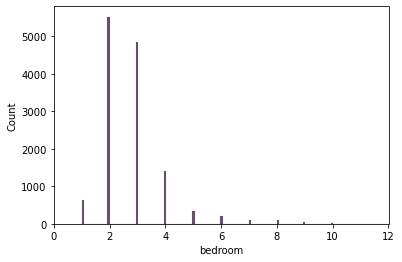

In [81]:
# let's see the bedroom distribution
g3 = sns.histplot(df7['bedroom'])
g3.set(xlim=(0, 12))
plt.show()

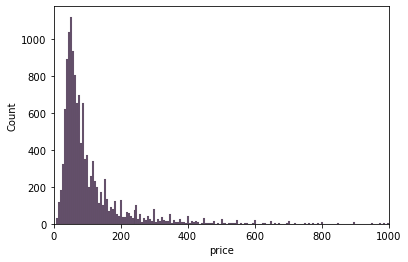

In [82]:
# let's see the price distribution
g4 = sns.histplot(df7['price'])
g4.set(xlim=(0, 1000))
plt.show()

3.4.2 Multivariate analysis

In [83]:
df7.head()

,area_type,location,total_sqft,bath,balcony,price,bedroom
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


Question we need to answer
- Is area type affect house price?
- Is there any difference in area type proportion in each location?
- Is there any relationship between price and total area?
- Is there any relationship between bedroom, bathroom, balcony and total area?
- What location has the most expensive house price?


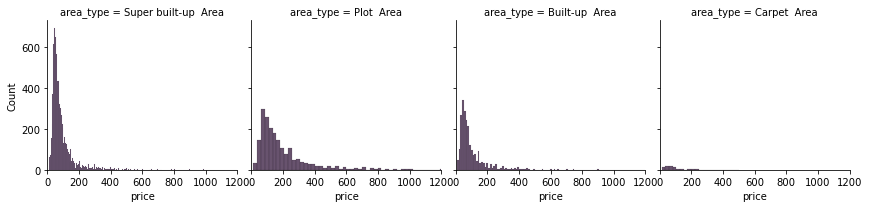

In [84]:
# Is area type affect house price?
# plot histogram of house price in each area type
g5 = sns.FacetGrid(df7, col='area_type')
g5.map_dataframe(sns.histplot, x='price')
g5.set(xlim=(0, 1200))

Area type clearly doesn't have much effect on house price.

In [85]:
# Is there any difference in area type proportion in each location?
df7['location'].value_counts(ascending=False)[:10]

Whitefield               537
Sarjapur  Road           397
Electronic City          302
Kanakpura Road           271
Thanisandra              233
Yelahanka                212
Uttarahalli              186
Hebbal                   177
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

In [86]:
lotoexamine = ['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road', 'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Hebbal', 'Marathahalli', 'Raja Rajeshwari Nagar']

df_lo = df7[df7['location'].isin(lotoexamine)]

In [87]:
df_lo.groupby('location')['area_type'].value_counts(normalize=True)

location               area_type           
Electronic City        Super built-up  Area    0.698675
                       Built-up  Area          0.268212
                       Plot  Area              0.033113
Hebbal                 Super built-up  Area    0.824859
                       Built-up  Area          0.129944
                       Plot  Area              0.028249
                       Carpet  Area            0.016949
Kanakpura Road         Super built-up  Area    0.863469
                       Built-up  Area          0.077491
                       Plot  Area              0.036900
                       Carpet  Area            0.022140
Marathahalli           Super built-up  Area    0.805714
                       Built-up  Area          0.131429
                       Plot  Area              0.062857
Raja Rajeshwari Nagar  Super built-up  Area    0.836257
                       Built-up  Area          0.111111
                       Plot  Area              0.052632
Sarj

Area type proportion in each location arn't much difference.

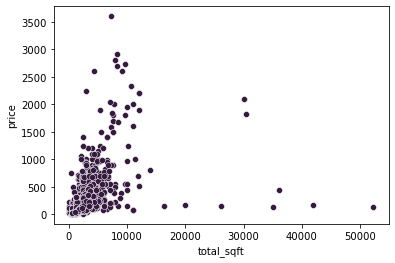

In [88]:
# Is there any relationship between price and total area?
sns.scatterplot(x='total_sqft', y='price', data=df7)
plt.show()

In [89]:
# calculate correlation coefficient between total area and price
df7['total_sqft'].corr(df7['price'])

0.5756324854383117

Price are partly depends on total area.

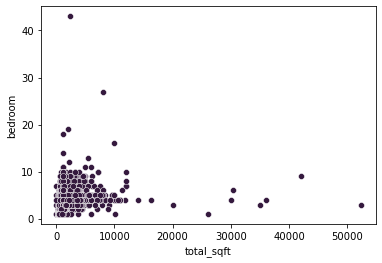

In [90]:
# Is there any relationship between bedroom, bathroom, balcony and total area?
# plot scatter to see relationship between total area and bedroom

sns.scatterplot(x='total_sqft', y='bedroom', data=df7)
plt.show()

In [91]:
# calculate correlation coefficient between total area and bedroom
df7['total_sqft'].corr(df7['bedroom'])

0.3481461679616832

Total area can't 100% determine number of bedrooms.

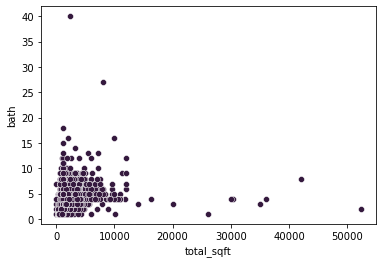

In [92]:
# Is there any relationship between bedroom, bathroom, balcony and total area?
# plot scatter to see relationship between total area and bathroom

sns.scatterplot(x='total_sqft', y='bath', data=df7)
plt.show()

In [93]:
# calculate correlation coefficient between total area and bathroom
df7['total_sqft'].corr(df7['bath'])

0.394752083283867

Total area can partly determine number of bathroom.

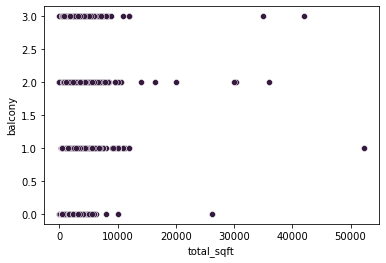

In [94]:
# Is there any relationship between bedroom, bathroom, balcony and total area?
# plot scatter to see relationship between total area and balcony

sns.scatterplot(x='total_sqft', y='balcony', data=df7)
plt.show()

In [95]:
# calculate correlation coefficient between total area and balcony
df7['total_sqft'].corr(df7['balcony'])

0.1331675176430702

Total area can't really determine number of balcony.

What location has the most expensive house price?

can add new feature called price per square feet
- can reflect how expensive in each area better than price
- from dataset description, price is in lark rupee which is 100000 rupee

In [96]:
# strip space of location
df7['location'] = df7['location'].apply(lambda x: x.strip())

#convert total_sqft data type from object to float
df7['total_sqft'] = df7['total_sqft'].astype(float)

df7['price_per_sqft'] = round(df7['price']*100000/df7['total_sqft'], 2)

In [97]:
df7['price_per_sqft'].describe()

count    1.325700e+04
mean     7.912825e+03
std      1.064976e+05
min      2.678300e+02
25%      4.271190e+03
50%      5.438600e+03
75%      7.313320e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [98]:
# calculate average price per sqft of each location
df7.groupby('location')['price_per_sqft'].mean().sort_values(ascending=False)[:25]

location
Grihalakshmi Layout                  625000.000000
Srirampuram                          481004.144000
Suragajakkanahalli                   339363.635000
Weavers Colony                        68801.313333
Raghuvanahalli                        38647.926000
Sarjapur  Road                        36391.867229
Cubbon Road                           35042.420000
Sector 3 HSR Layout                   31666.670000
Hsr layout sector3                    31250.000000
Sector 4 HSR Layout                   29166.670000
J P Nagar 7th Phase Ramayya City      29166.670000
Kathreguppe                           29166.665000
Vittal Mallya Road                    29126.210000
1A Block Koramangala                  27542.370000
Srinivas Colony                       27384.090000
Beml layout, Rajarajeshwari nagar     27083.330000
BEML Layout 5th Stage                 27083.330000
Old Town                              26666.670000
Indiranagar HAL 2nd Stage             26666.670000
Xavier Layout         

This is top 25 location most expensive averagae house price per square foot in Bengaluru.

##### 3.5 Dimensionally Reduction

In [99]:
df7['location'].value_counts()

Whitefield         538
Sarjapur  Road     397
Electronic City    304
Kanakpura Road     271
Thanisandra        236
                  ... 
Gandhi Nagar         1
GKW Layout           1
Garden Layout        1
T G extension        1
Sindhi Colony        1
Name: location, Length: 1287, dtype: int64

In [100]:
len(df7['location'].value_counts())

1287

Location column has too many distinct value. so we can list place that has less than 10 counts as other.

In [101]:
location_series = df7['location'].value_counts()

Under 10 counts will be listed as other.

In [102]:
# filter less than 10 counts location
location_series_less_than_10 = location_series[location_series < 10]

In [103]:
location_series_less_than_10

4th Block Koramangala    9
KUDLU MAIN ROAD          9
Mathikere                9
Yemlur                   9
Vignana Nagar            9
                        ..
Gandhi Nagar             1
GKW Layout               1
Garden Layout            1
T G extension            1
Sindhi Colony            1
Name: location, Length: 1033, dtype: int64

In [104]:
df7.location = df7.location.apply(lambda x: 'other' if x in location_series_less_than_10 else x)

In [105]:
df7.head()

,area_type,location,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.81
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.38
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.56
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.89
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.00


##### 3.6 Outlier Removal

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


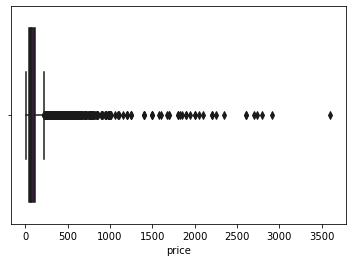

In [106]:
# plot box plot of house price
sns.boxplot('price', data=df7)
plt.show()

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


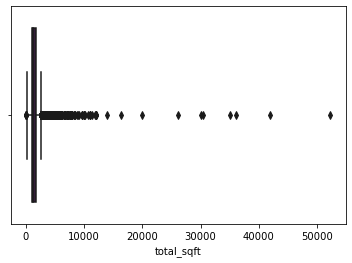

In [107]:
# plot box plot of house total area
sns.boxplot('total_sqft', data=df7)
plt.show()

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


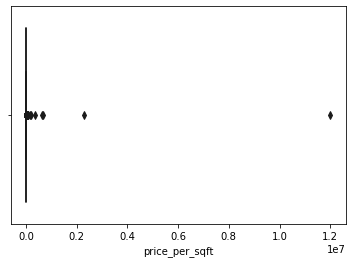

In [108]:
# plot box plot of house price per sqft
sns.boxplot('price_per_sqft', data=df7)
plt.show()

From many scatter plots including above box plots, we can see that this dataset contains a lot of outliers so we will try to remove the extreme values.

From information that we know, 1 general bedroom apartment in Bengaluru should be at least 300 sqft.

In [109]:
# filter house that 1 bedroom area is less than 300 sqft.
df7[df7.total_sqft/df7.bedroom < 300]

,area_type,location,total_sqft,bath,balcony,price,bedroom,price_per_sqft
58,Plot Area,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.98
68,Plot Area,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.30
70,Plot Area,other,500.0,3.0,2.0,100.0,3,20000.00
78,Built-up Area,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.61
89,Plot Area,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.21
...,...,...,...,...,...,...,...,...
12871,Plot Area,JP Nagar,600.0,5.0,3.0,110.0,4,18333.33
12905,Plot Area,5th Block Hbr Layout,1200.0,5.0,3.0,205.0,5,17083.33
13217,Plot Area,other,1200.0,3.0,2.0,125.0,6,10416.67
13277,Plot Area,other,1400.0,7.0,1.0,218.0,7,15571.43


We can drop this outlier.

In [110]:
df8 = df7[df7.total_sqft/df7.bedroom > 300]

In [111]:
df8.shape

(12331, 8)

In [112]:
df8['price_per_sqft'].describe()

count     12331.000000
mean       6211.250032
std        4046.224835
min         267.830000
25%        4200.000000
50%        5268.200000
75%        6827.790000
max      176470.590000
Name: price_per_sqft, dtype: float64

Here we can find that the minimum of price per sqft is 267 rs whereas maximum of price per sqft is around 1760000 rs, this shows a wide variation in the real estate price. So we can drop sample that price per sqft exceed or lower average value by 3 times of S.D of each location.

In [113]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-3*st)) & (subdf.price_per_sqft<=(m+3*st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [114]:
df9 = remove_pps_outliers(df8)

In [115]:
df9.shape

(12150, 8)

In [116]:
# Let's check a distribution of price in each location
# This function will plot distribution of 2 and 3 bedroom total area and price in given location 
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bedroom==2)]
    bhk3 = df[(df.location==location) & (df.bedroom==3)]
    plt.rcParams['figure.figsize'] = (12,8)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bedroom', s=40)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 bedroom', s=40)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

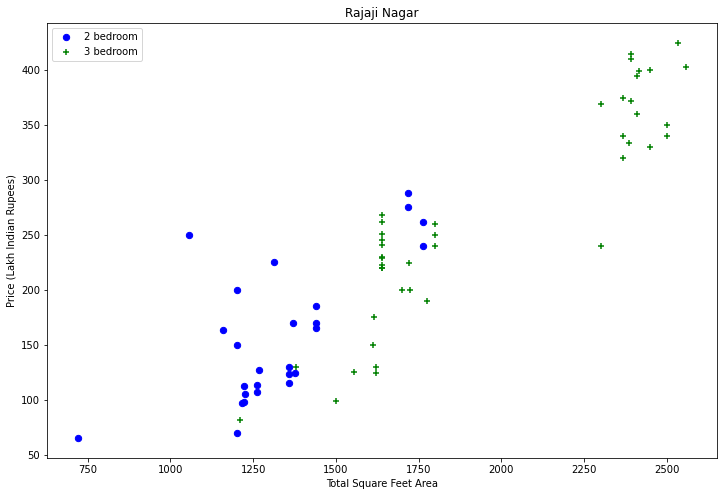

In [117]:
# plot scatter plot of Electromic city
plot_scatter_chart(df9,"Rajaji Nagar")

we can remove properties with 2 bedroom that has higher price than 3 bedroom and same totala area in the same location.

In [118]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bedroom'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bedroom'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [119]:
df10 = remove_bhk_outliers(df9)

In [120]:
df10.shape

(8588, 8)

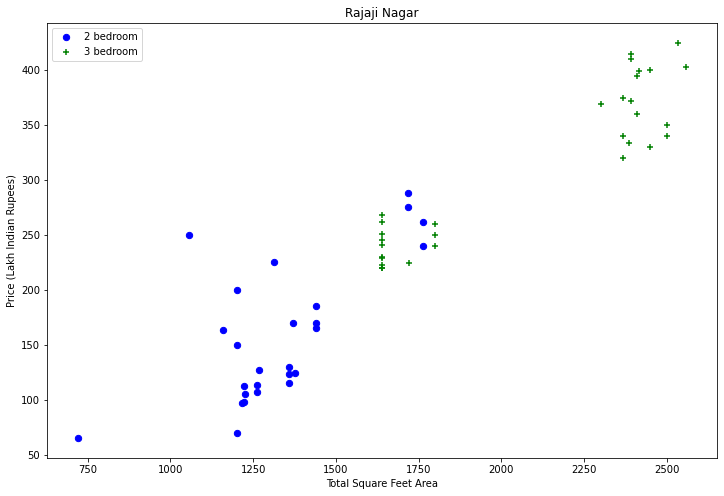

In [121]:
plot_scatter_chart(df10,"Rajaji Nagar")

Can clearly seet from the garph that the 3 bedroom below the trend was removed.

In general, number of bathroom should not exceed number of bedroom by 2, so we can remove house with number of bathroom more than bedroom by 2.

In [122]:
df11 = df10[df10['bath'] < df10['bedroom'] + 2]

In [123]:
df11.shape

(8474, 8)

In [124]:
df11.head()

,area_type,location,total_sqft,bath,balcony,price,bedroom,price_per_sqft
0,Super built-up Area,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,15017.54
1,Super built-up Area,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,11901.84
2,Super built-up Area,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,12533.33
3,Plot Area,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4,18750.00
4,Super built-up Area,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2,6000.00


##### 3.7 Convert categorical feature into numerical feature

In [125]:
# drop price per sqft feature
df12 = df11.drop('price_per_sqft', axis = 1)

will use LabelEncoder to convert area type to numerical feature

In [126]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df12['area_type'] = label_encoder.fit_transform(df12['area_type'])

In [127]:
df12.head()

,area_type,location,total_sqft,bath,balcony,price,bedroom
0,3,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,3,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,3,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,2,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4
4,3,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2


In [128]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8474 entries, 0 to 12149
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area_type   8474 non-null   int64  
 1   location    8474 non-null   object 
 2   total_sqft  8474 non-null   float64
 3   bath        8474 non-null   float64
 4   balcony     8474 non-null   float64
 5   price       8474 non-null   float64
 6   bedroom     8474 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 529.6+ KB


In [129]:
df12['area_type'].value_counts()

3    6006
0    1530
2     881
1      57
Name: area_type, dtype: int64

#### 4. Feature Selection

Check the relationship between area type and house price by calculating correlation value

In [130]:
df12['area_type'].corr(df12['price'])

-0.06970622920910759

Look like there is no relationship between area type and house price so we can drop area type feature

In [131]:
df13 = df12.drop('area_type', axis='columns')

In [132]:
df13.head()

,location,total_sqft,bath,balcony,price,bedroom
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,2.0,450.0,4
4,1st Block Jayanagar,1000.0,3.0,2.0,60.0,2


Plot heatmap of correlation between each feature except location.

/var/folders/g1/g_9zbkxs5l93w9hhc55wfsx80000gn/T/ipykernel_13365/477267399.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

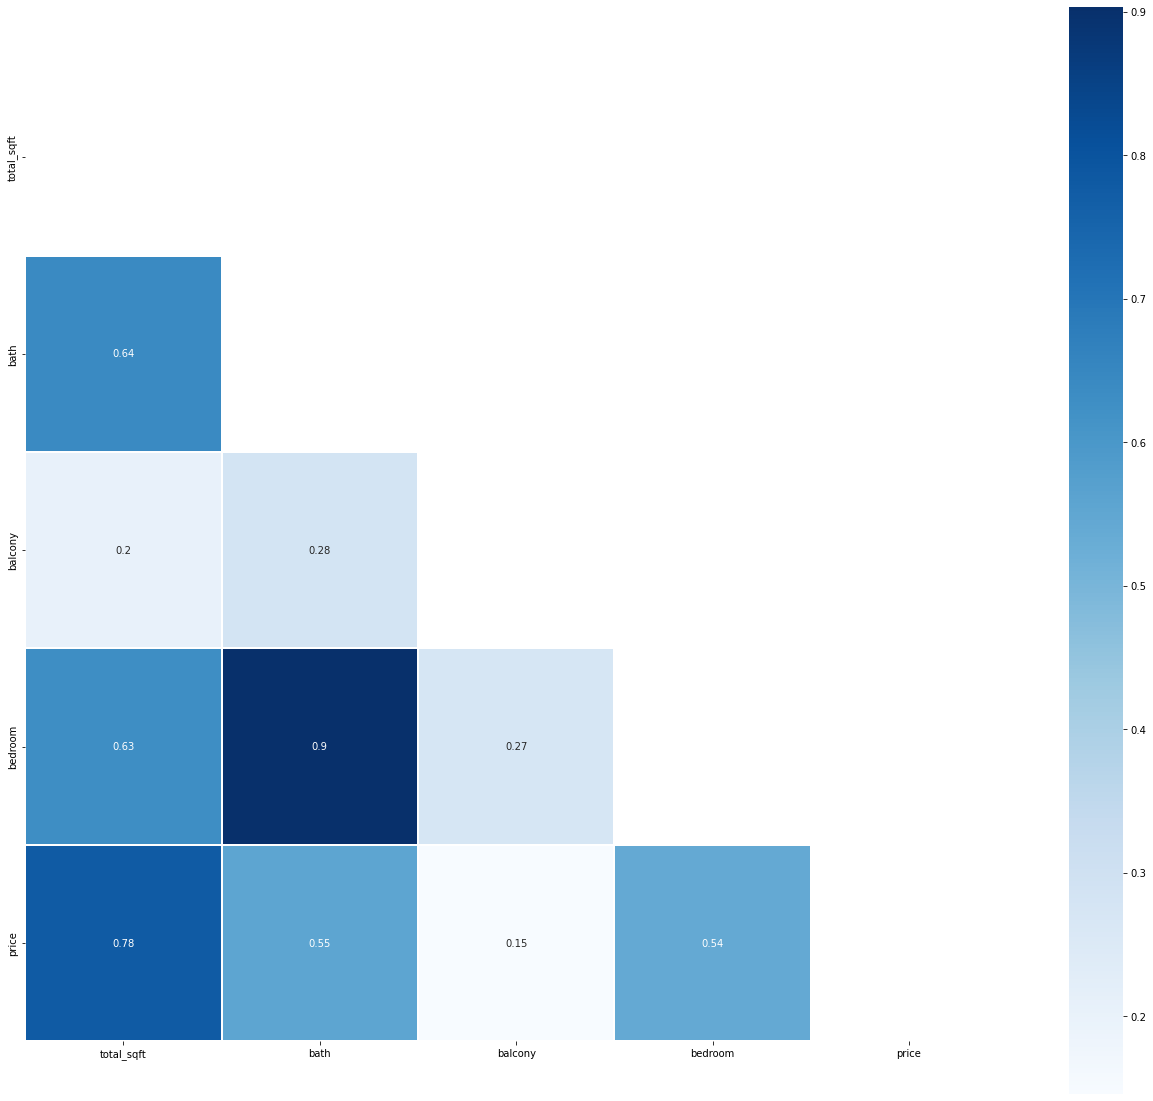

In [133]:
fig, ax = plt.subplots(figsize=(22,20))
corr = df13[['total_sqft', 'bath', 'balcony', 'bedroom', 'price']].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, annot=True, mask=mask, square=True, cmap='Blues', linewidths=0.4)

Look like every feature but balcony can use to predict house price so we can drop balcony.

In [134]:
df14 = df13.drop('balcony', axis='columns')

In [135]:
df14.head()

,location,total_sqft,bath,price,bedroom
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,2400.0,4.0,450.0,4
4,1st Block Jayanagar,1000.0,3.0,60.0,2


create one hot encoding for location

In [136]:
# use get dummies function to convert location to numerical feature
location_dummies = pd.get_dummies(df14.location)

In [137]:
location_dummies.head()

,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df15 = pd.concat([df14.drop('location', axis=1), location_dummies], axis=1)

In [139]:
df15.head()

,total_sqft,bath,price,bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,450.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000.0,3.0,60.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
df15.shape

(8474, 259)

#### 5. Model Building

will use these algorithms to create the model
- Linear regression
- Decision tree
- Lasso regression

First, split the datasets into train and test datasets

In [141]:
# get indendant or x variables
X = df15.drop('price', axis=1)
X.head()

,total_sqft,bath,bedroom,1st Block Jayanagar,1st Block Koramangala,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2400.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000.0,3.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
# get dependant or y variable
y = df15.price

In [143]:
# import method from sklearn to help split the datasets
from sklearn.model_selection  import train_test_split

In [144]:
# make 80% training and 20% testing datasets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

##### 5.1 Linear Regression

will use linear regression model to predict the house price.

In [145]:
# import LinearRegression method from sklearn
from sklearn.linear_model import LinearRegression

In [146]:
# create and train the model with training datasets
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

Calculate R-squared to see how well the model predicted

In [147]:
from sklearn.metrics import r2_score
y_pred = lr_model.predict(X_test)
r2_score(y_test, y_pred)

0.6803743558106485

The model is well predicted.

In [148]:
# calculate Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

7397.363766193386

In [174]:
# check the accuracy
lr_model.score(X_test, y_test)

0.6803743558106485

Use K fold Cross Validation to measure model's accuracy

In [149]:
# import ShuffleSplit to split the datasets
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# Split the datasets into 5 folds
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.68037436, 0.74314088, 0.77620432, 0.72160914, 0.75489262])

#### 5.2 Lasso regression

In [171]:
# import the model library
from sklearn.linear_model import Lasso

In [172]:
# train the model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [173]:
# check the accuracy
lasso_model.score(X_test, y_test)

0.6593023459892381

#### 5.3 Decision tree

In [168]:
# import the library
from sklearn.tree import DecisionTreeRegressor

In [169]:
# train the model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [170]:
# check the accuracy
tree_model.score(X_test, y_test)

0.6986746466665468

#### 6. Hyperparameter tuning

find the best model by using GridSearchCV from these algorithms
- Linear Regression
- Lasso Regression
- Decision Tree

In [150]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

create function that help find the best model

In [185]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_*100,
            'best_params': gs.best_params_
        })
    df_final = pd.DataFrame(scores,columns=['model','best_score','best_params'])

    return df_final.sort_values(by=['best_score'], ascending=False)

In [186]:
# Use the function to find the best model
find_best_model_using_gridsearchcv(X,y)

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeli

,model,best_score,best_params
0,linear_regression,73.524426,{'normalize': False}
2,decision_tree,72.658385,"{'criterion': 'mse', 'splitter': 'best'}"
1,lasso,68.514474,"{'alpha': 1, 'selection': 'random'}"


Linear regression without normalization is the most accurate model.

#### 7. Model Deployment

In [153]:
# create final model
lr_model_final = LinearRegression(normalize=False)
lr_model_final.fit(X_train, y_train)

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(normalize=False)

create function to predict the house price

In [154]:
def predict_house_price(location, sqft, bath, bedroom):
    # find column index of location
    location_index = np.where(X.columns == location)[0][0]
    
    # create zero array that has length equal to number of X columns
    array_pred = np.zeros(len(X.columns))
    array_pred[0] = sqft
    array_pred[1] = bath
    array_pred[2] = bedroom
    array_pred[location_index] = 1

    return lr_model_final.predict([array_pred])[0]
    
    

In [155]:
predict_house_price('Electronic City',1000, 2, 3)

/Library/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


48.67347141330744

use joblib to import the model

In [156]:
from joblib import dump
dump(lr_model_final, 'final_model_v1.joblib')

['final_model_v1.joblib']

#### 8. Solution of the problem statement

Our linear regression model accuracy is around 70 %. 

Discover how each feature impact on the price by calculate feature importance from decision tree model.

In [187]:
# create function to calculate feature importance
# calculate feature importance

def cal_feature_importance(model, col_name):
    fea_im = model.feature_importances_
    fea_im_df = pd.DataFrame({'feature':[],'importance (%)':[]})
    for i in range(len(fea_im)):
        fea_im_df2 = pd.DataFrame({'feature':[col_name[i]],'importance (%)':[round(fea_im[i]*100, 2)]})
        fea_im_df = pd.concat([fea_im_df, fea_im_df2], axis=0, ignore_index=True)
    return fea_im_df.sort_values('importance (%)', ascending=False)[:10]

In [188]:
cal_feature_importance(tree_model, X_train.columns)

,feature,importance (%)
0,total_sqft,74.96
2,bedroom,4.61
1,bath,3.39
257,other,1.89
176,Malleshwaram,1.65
251,Whitefield,1.45
72,Cunningham Road,1.45
209,Rajaji Nagar,1.07
248,Vishveshwarya Layout,0.76
123,Indira Nagar,0.62


The main factors of the house price is total area (75%), number of bedrooms (4.61%) and number of bathroom (3.39%) respectively.

#### 9. How to improve the project
- use other machine learning algorithms such as XGBoost
- create web application for user to easily use the model to predict the house house price